In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
temp = pd.read_csv('GlobalTemperatures.csv')
maunaloa_wide = pd.read_csv('maunaloa.csv')

In [3]:
months = maunaloa_wide.columns[1:-1].values

In [4]:
maunaloa_wide.columns.values[0]= 'year'

In [5]:
maunaloa = maunaloa_wide.melt(id_vars='year', value_vars=months, var_name='month', value_name='ppmv')

In [6]:
maunaloa.month = pd.Categorical(maunaloa.month, months)

In [7]:
maunaloa = maunaloa.sort_values(by=['year','month'])

In [8]:
maunaloa = maunaloa.reset_index(drop = True)

In [9]:
maunaloa.insert(maunaloa.columns.get_loc('month'),'num_month',0)

In [10]:
for i in range(1, 13):
    maunaloa.loc[maunaloa.month==months[i-1], 'num_month'] = i

In [11]:
maunaloa.tail(5)

,year,num_month,month,ppmv
607,2008,8,Aug,383.95
608,2008,9,Sep,382.91
609,2008,10,Oct,382.73
610,2008,11,Nov,383.96
611,2008,12,Dec,385.02


In [12]:
temp = temp[['dt', 'LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']]

In [13]:
temp.columns

Index(['dt', 'LandAverageTemperature', 'LandMaxTemperature',
       'LandMinTemperature', 'LandAndOceanAverageTemperature'],
      dtype='object')

In [14]:
temp.insert(temp.columns.get_loc("LandAverageTemperature"), "year", 0)

In [15]:
temp.insert(temp.columns.get_loc("LandAverageTemperature"), "num_month", 0)

In [16]:
temp['year'] = [int(str(date)[:4]) for date in temp['dt']]

In [17]:
temp['num_month'] = [int(str(date)[5:7]) for date in temp['dt']]

In [18]:
temp.head(5)

,dt,year,num_month,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,1750,1,3.034,NaN,NaN,NaN
1,1750-02-01,1750,2,3.083,NaN,NaN,NaN
2,1750-03-01,1750,3,5.626,NaN,NaN,NaN
3,1750-04-01,1750,4,8.490,NaN,NaN,NaN
4,1750-05-01,1750,5,11.573,NaN,NaN,NaN


In [19]:
temp = temp.drop(columns='dt')

In [20]:
maunaloa = maunaloa.set_index(['year', 'num_month'])

In [21]:
temp = temp.set_index(['year', 'num_month'])

In [22]:
maunaloa.join(temp)

month    ppmv  LandAverageTemperature  LandMaxTemperature  \
year num_month                                                             
1958 1           Jan  -99.99                   3.574               8.977   
     2           Feb  -99.99                   3.695               9.546   
     3           Mar  315.70                   5.453              11.321   
     4           Apr  317.45                   8.520              14.392   
     5           May  317.50                  11.519              17.355   
...              ...     ...                     ...                 ...   
2008 8           Aug  383.95                  14.377              20.176   
     9           Sep  382.91                  12.802              18.629   
     10          Oct  382.73                  10.399              16.038   
     11          Nov  383.96                   7.224              12.738   
     12          Dec  385.02                   4.385               9.834   

                LandMinTemperature  LandAndOceanAverageTemperature  
year num_month                                                      
1958 1                      -1.772                          13.881  
     2                      -1.949                          14.071  
     3                      -0.549                          14.547  
     4                       2.570                          15.359  
     5                       5.625                          16.180  
...                            ...                             ...  
2008 8                       8.594                          17.282  
     9                       7.116                          16.757  
     10                      4.847                          15.931  
     11                      1.796                          14.919  
     12                     -0.946                          14.151  

[612 rows x 6 columns]

In [23]:
co2_temp_with_nan = maunaloa.join(temp)

In [24]:
co2_temp_with_nan = co2_temp_with_nan.reset_index()

In [25]:
co2_temp_with_nan.loc[co2_temp_with_nan.ppmv==-99.99]

,year,num_month,month,ppmv,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1958,1,Jan,-99.99,3.574,8.977,-1.772,13.881
1,1958,2,Feb,-99.99,3.695,9.546,-1.949,14.071
73,1964,2,Feb,-99.99,3.028,8.791,-2.613,13.730
74,1964,3,Mar,-99.99,4.865,10.970,-1.152,14.256
75,1964,4,Apr,-99.99,7.922,13.794,2.152,15.062


In [26]:
co2_temp = co2_temp_with_nan.drop(index = co2_temp_with_nan.loc[(co2_temp_with_nan.year==1958) | (co2_temp_with_nan.year == 1964)].index)

In [27]:
co2_temp = co2_temp.rename(columns = {'LandAverageTemperature' : 'land', 'LandMaxTemperature' : 'landmax', 'LandMinTemperature' : 'landmin', 'LandAndOceanAverageTemperature' : 'landoceanavg'})

In [28]:
co2_temp.head(5)

,year,num_month,month,ppmv,land,landmax,landmin,landoceanavg
12,1959,1,Jan,315.62,2.959,8.390,-2.406,13.636
13,1959,2,Feb,316.38,3.330,9.004,-2.225,13.873
14,1959,3,Mar,316.71,5.854,11.728,-0.071,14.612
15,1959,4,Apr,317.72,8.819,14.752,2.807,15.439
16,1959,5,May,318.29,11.323,17.164,5.536,16.122


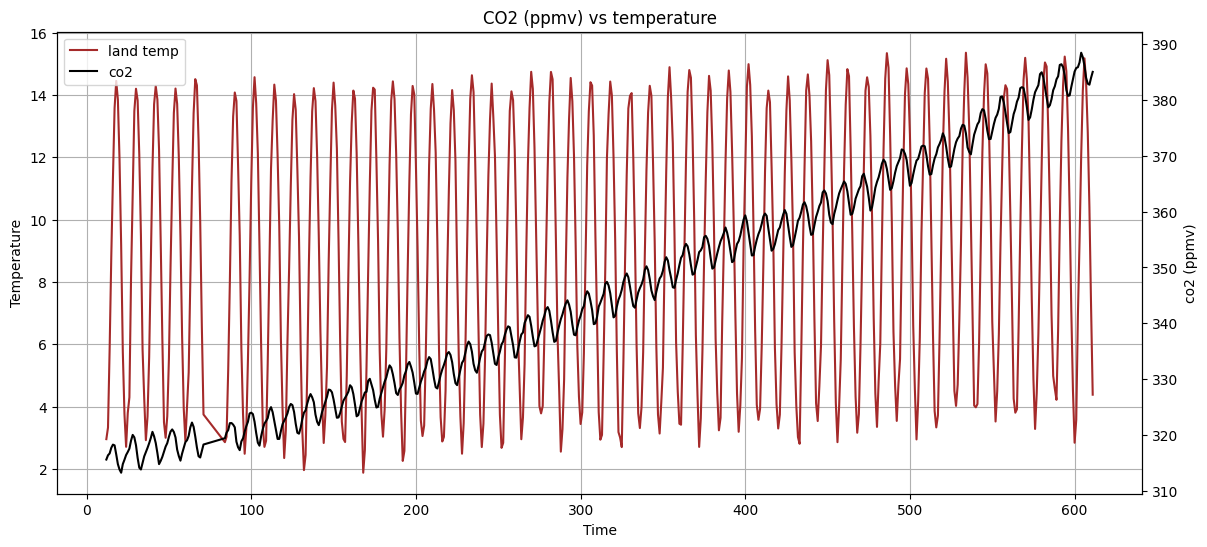

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('CO2 (ppmv) vs temperature')
ax.grid(True)

# First y axis
ax.plot(co2_temp.index, co2_temp.land, color='brown', label='land temp')
#ax.plot(co2_temp.index, co2_temp.landoceanavg, color='blue', linestyle='--', label='land + ocean temp')
#ax.plot(co2_temp.index, co2_temp.landmin, color='green', linestyle='--', label='land minimum')
#ax.plot(co2_temp.index, co2_temp.landmax, color='red', linestyle='--', label='land minimum')

# Second y-axis
axb.set_ylabel('co2 (ppmv)')
axb.plot(co2_temp.index, co2_temp.ppmv, color='black', label='co2')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

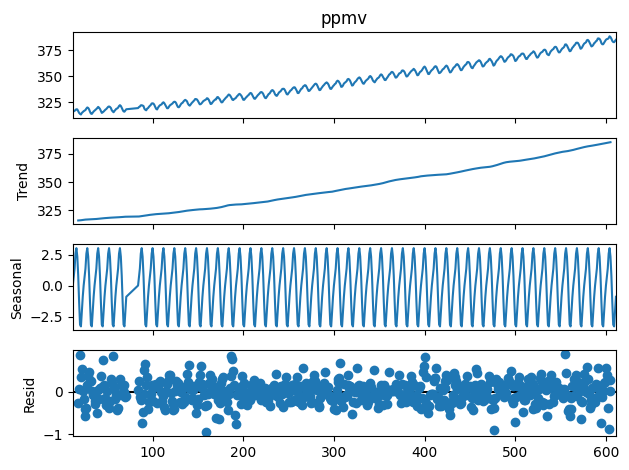

In [30]:
result = seasonal_decompose(co2_temp['ppmv'], model='additive', period=12)
result.plot()
plt.show()

In [31]:
co2_temp.shape

(588, 8)

In [32]:
co2tempdiff = co2_temp

In [33]:
data_cols = co2tempdiff.columns[3:]

In [34]:
data_cols

Index(['ppmv', 'land', 'landmax', 'landmin', 'landoceanavg'], dtype='object')

In [35]:
for col in data_cols:
    co2tempdiff[col] = co2_temp[col].diff(periods=12)

In [36]:
co2tempdiff = co2tempdiff.dropna()

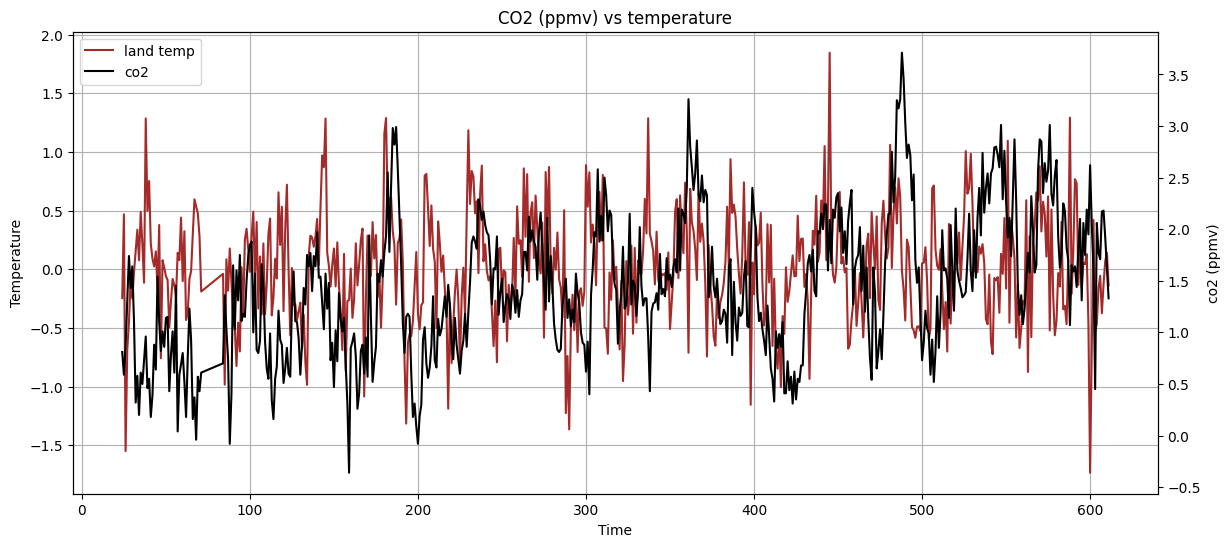

In [37]:
fig, ax = plt.subplots(figsize=(14, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('CO2 (ppmv) vs temperature')
ax.grid(True)

# First y axis
ax.plot(co2tempdiff.index, co2tempdiff.land, color='brown', label='land temp')
#ax.plot(co2tempdiff.index, co2_temp.landoceanavg, color='blue', linestyle='--', label='land + ocean temp')
#ax.plot(co2tempdiff.index, co2_temp.landmin, color='green', linestyle='--', label='land minimum')
#ax.plot(co2tempdiff.index, co2_temp.landmax, color='red', linestyle='--', label='land minimum')

# Second y-axis
axb.set_ylabel('co2 (ppmv)')
axb.plot(co2tempdiff.index, co2tempdiff.ppmv, color='black', label='co2')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

In [38]:
adfuller(co2tempdiff['ppmv'])  # the first element of the output is the test statistic, and the second one is the p-value
# p<0.05 - H0 is rejected - no stationarity

(-4.466661506657159,
 0.00022579098267536308,
 13,
 562,
 {'1%': -3.442039359113542,
  '5%': -2.8666965134862514,
  '10%': -2.5695162601790758},
 370.61169298595553)

In [39]:
adfuller(co2tempdiff['land'])

(-8.431228474353778,
 1.8677992438797957e-13,
 13,
 562,
 {'1%': -3.442039359113542,
  '5%': -2.8666965134862514,
  '10%': -2.5695162601790758},
 401.729533824324)

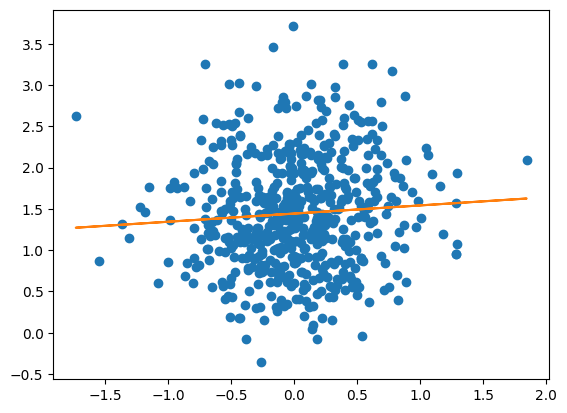

In [43]:
m, b = np.polyfit(co2tempdiff['land'], co2tempdiff['ppmv'], 1)

# add linear regression line to scatterplot 
plt.plot(co2tempdiff['land'], co2tempdiff['ppmv'], 'o')
plt.plot(co2tempdiff['land'], m*co2tempdiff['land']+b)

In [44]:
import statsmodels.formula.api as smf

mod = smf.ols('ppmv ~ land', data=co2tempdiff)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ppmv   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.675
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.103
Time:                        16:48:22   Log-Likelihood:                -589.92
No. Observations:                 576   AIC:                             1184.
Df Residuals:                     574   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4437      0.028     51.307      0.0

In [46]:
print(res.get_robustcov_results(cov_type='HC1', use_t=None).summary())

                            OLS Regression Results                            
Dep. Variable:                   ppmv   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.898
Date:                Sun, 31 Mar 2024   Prob (F-statistic):             0.0892
Time:                        16:49:40   Log-Likelihood:                -589.92
No. Observations:                 576   AIC:                             1184.
Df Residuals:                     574   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4437      0.028     51.340      0.0